# Context
Automobile, The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes. Cylinders, model years, and origin are multi-valued discrete. Acceleration, horsepower, weight and mpg are continuous attributes. 

# Objective
To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

# Part A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from  scipy.stats import zscore

In [100]:
v1 = pd.read_csv('Car name.csv') # Reading car name

In [101]:
v1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [102]:
v1.shape

(398, 1)

In [103]:
v2 = pd.read_json('Car-Attributes.json') # Reading car attributes

In [104]:
v2.shape

(398, 8)

In [105]:
v2.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
311,32.1,4,98.0,70,2120,15.5,80,1
37,18.0,6,232.0,100,3288,15.5,71,1
348,37.7,4,89.0,62,2050,17.3,81,3
141,29.0,4,98.0,83,2219,16.5,74,2
353,33.0,4,105.0,74,2190,14.2,81,2
24,21.0,6,199.0,90,2648,15.0,70,1
75,14.0,8,318.0,150,4077,14.0,72,1
49,23.0,4,122.0,86,2220,14.0,71,1
171,24.0,4,134.0,96,2702,13.5,75,3
192,22.0,6,250.0,105,3353,14.5,76,1


In [106]:
df = pd.concat([v1,v2],axis = 1) #Merging two data frames

In [107]:
df.sample(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
30,chevrolet vega 2300,28.0,4,140.0,90,2264,15.5,71,1
295,dodge colt hatchback custom,35.7,4,98.0,80,1915,14.4,79,1
132,chevrolet vega,25.0,4,140.0,75,2542,17.0,74,1
358,mazda 626,31.6,4,120.0,74,2635,18.3,81,3
265,dodge magnum xe,17.5,8,318.0,140,4080,13.7,78,1
140,amc matador (sw),14.0,8,304.0,150,4257,15.5,74,1
92,ford ltd,13.0,8,351.0,158,4363,13.0,73,1
50,opel 1900,28.0,4,116.0,90,2123,14.0,71,2
350,plymouth horizon 4,34.7,4,105.0,63,2215,14.9,81,1
161,chevroelt chevelle malibu,16.0,6,250.0,105,3897,18.5,75,1


In [108]:
df.shape

(398, 9)

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Insights:
Here mpg, displacement, horsepower, weight, acceleration are continuous data but model year, cylinder and origin are discrete multivalued discrete data. So multivalues discrete data does not share much insight from this table but continuous variables gives us the distribution of it's values, like quantiles, min, max, IQR = Q3-Q2 etc. 


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [111]:
# Determining the percentage of missing values in each columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

         column_name  percent_missing
car_name    car_name              0.0
mpg              mpg              0.0
cyl              cyl              0.0
disp            disp              0.0
hp                hp              0.0
wt                wt              0.0
acc              acc              0.0
yr                yr              0.0
origin        origin              0.0


Check for duplicate value

In [112]:
df.duplicated(subset =['hp','car_name','cyl'])

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [113]:
df.hp.duplicated().sum()

304

In [114]:
df.origin.duplicated().sum()

395

In [115]:
temp = pd.DataFrame(df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [116]:
# Preparing the 'hp' column
mpg_df = df.replace('?', np.nan) 
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [117]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [118]:
# Imputing missing value with median
numeric_cols = mpg_df.drop('car_name', axis=1) 
car_names = pd.DataFrame(mpg_df[['car_name']])
numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


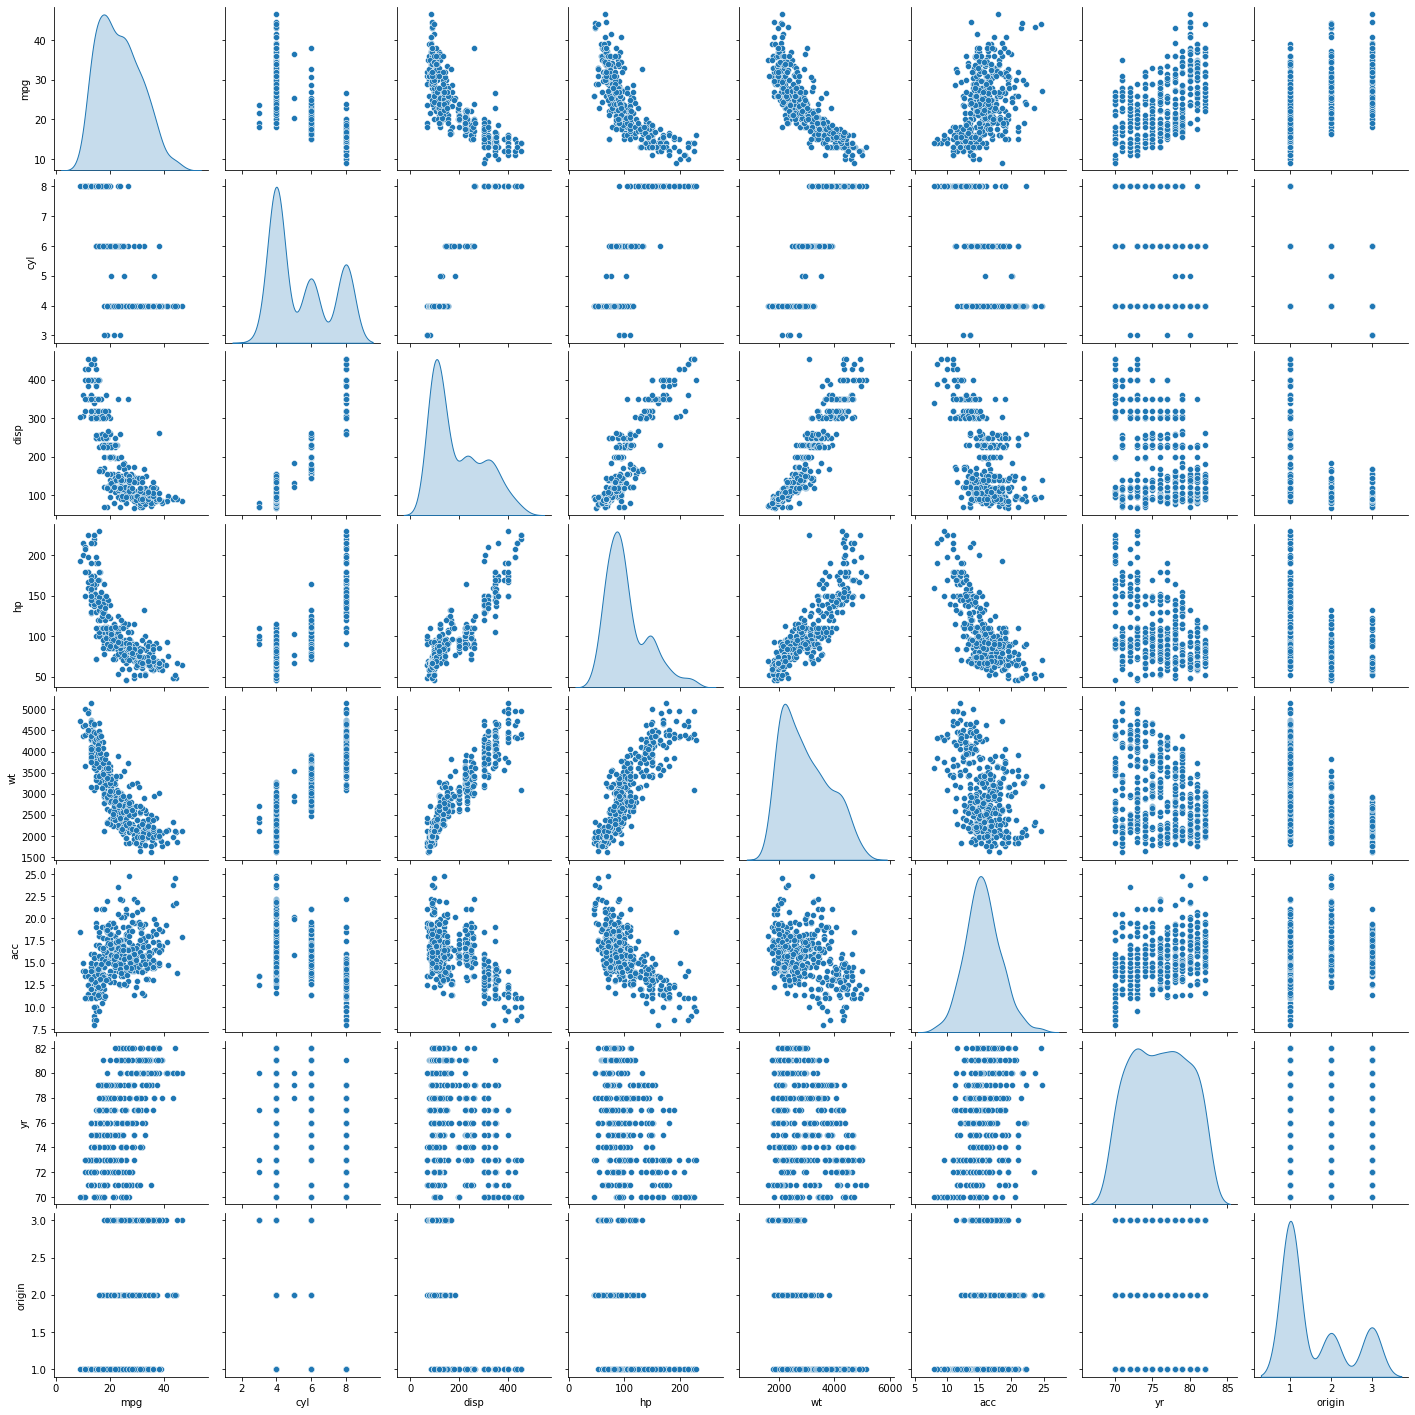

In [119]:
mpg_df_attr = mpg_df.iloc[:, 0:8]

sns.pairplot(mpg_df_attr, diag_kind='kde');

In the above pairplot we can easily see a lot of positive and negetive correlation prominantly. To understand them properly I have plotted some scatter plot separately below.

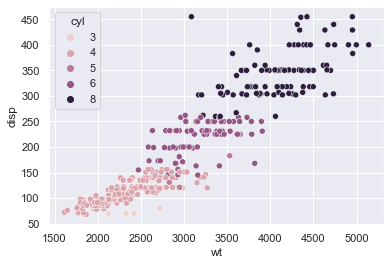

In [120]:
sns.set(style='darkgrid')
sns.scatterplot(x="wt",y="disp",data=mpg_df, hue = 'cyl');

weight and displacement share a positive correlation. Higher number of cylinders exists in heavier vehicles.

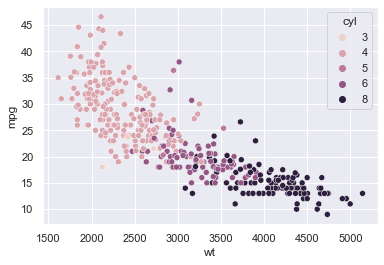

In [121]:
sns.set(style='darkgrid')
sns.scatterplot(x="wt",y="mpg",data=mpg_df, hue = 'cyl');

Weight and mpg share an overall negetive correlation. Heavier vehicles has higher number of cylinder and low mpg.

In [122]:
mpg_df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [123]:
mpg_df_attr_z = mpg_df_attr.apply(zscore) # Standardizing car features

Applying KMeans


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

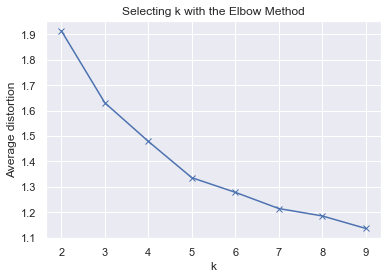

In [124]:
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mpg_df_attr_z)
    prediction=model.predict(mpg_df_attr_z)
    meanDistortions.append(sum(np.min(cdist(mpg_df_attr_z, model.cluster_centers_, 'euclidean'), axis=1)) / mpg_df_attr_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Possible elbow points are 3 and 5

In [153]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(mpg_df_attr_z)
prediction=final_model.predict(mpg_df_attr_z)
mpg_df["GROUP"] = prediction
print("Groups Assigned : \n")
mpg_df.sample(5)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,GROUP
101,23.0,6,198.0,95.0,2904,16.0,73,1,plymouth duster,2
186,27.0,4,101.0,83.0,2202,15.3,76,2,renault 12tl,0
90,12.0,8,429.0,198.0,4952,11.5,73,1,mercury marquis brougham,1
122,24.0,4,121.0,110.0,2660,14.0,73,2,saab 99le,0
76,18.0,4,121.0,112.0,2933,14.5,72,2,volvo 145e (sw),2


In [126]:
mpg_dfCulster = mpg_df.groupby(['GROUP'])
mpg_dfCulster.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,21.694074,5.259259,188.544444,94.725926,2992.651852,16.797037,76.311111,1.074074
1,30.420859,4.067485,103.638037,77.730061,2242.515337,16.296933,77.147239,2.337423
2,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000


Passing an arbitrary data point and determine which cluster it will belong to

In [145]:
p = mpg_dfCulster.mean()

In [151]:
from scipy.spatial.distance import cdist
c1 = p.iloc[0,0:8].to_list() # centroid of first cluster 
c2 = p.iloc[1,0:8].to_list() # centroid of second cluster 
c3 = p.iloc[2,0:8].to_list() # centroid of third cluster 
arr1 = [c1,c2,c3]
arrp = [[16,9,280,100,3400,19.4,70,2]]
dist = cdist(arr1,arrp)
print(dist)
print(min(dist))
print("the arbitrary data point will belong to : c1")

[[ 417.63420214]
 [1171.18032477]
 [ 732.48330402]]
[417.63420214]
Arbitrary point will belong to : c1


Plot a visual and colour data point based on cluster

In [100]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

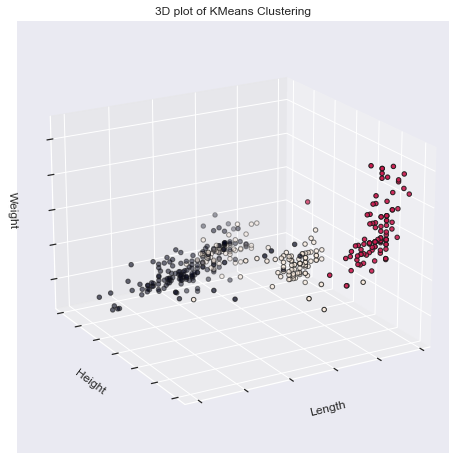

In [101]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
final_model.fit(mpg_df_attr_z)
labels = final_model.labels_
ax.scatter(mpg_df_attr_z.iloc[:, 0], mpg_df_attr_z.iloc[:, 1], mpg_df_attr_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [155]:
# Let us first start with K = 5
final_model1=KMeans(5)
final_model1.fit(mpg_df_attr_z)
prediction1=final_model1.predict(mpg_df_attr_z)
mpg_df["GROUP"] = prediction1
print("Groups Assigned : \n")
mpg_df.sample(10)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,GROUP
372,27.0,4,151.0,90.0,2735,18.0,82,1,pontiac phoenix,2
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis,1
123,20.0,6,156.0,122.0,2807,13.5,73,3,toyota mark ii,4
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300,0
213,13.0,8,350.0,145.0,4055,12.0,76,1,chevy c10,1
357,32.9,4,119.0,100.0,2615,14.8,81,3,datsun 200sx,0
163,18.0,6,225.0,95.0,3785,19.0,75,1,plymouth fury,3
244,43.1,4,90.0,48.0,1985,21.5,78,2,volkswagen rabbit custom diesel,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,2
143,26.0,4,97.0,78.0,2300,14.5,74,2,opel manta,4


In [156]:
mpg_dfCulster = mpg_df.groupby(['GROUP'])
mpg_dfCulster.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,34.137500,4.083333,99.527778,72.875000,2155.819444,16.734722,79.416667,2.763889
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,28.791045,4.194030,132.567164,82.865672,2563.805970,16.549254,79.671642,1.074627
3,19.104938,6.222222,233.444444,101.882716,3298.580247,16.632099,75.703704,1.037037
4,24.619048,4.047619,108.601190,85.672619,2347.619048,16.107143,73.309524,2.107143


In [157]:
p = mpg_dfCulster.mean()

In [159]:
from scipy.spatial.distance import cdist
c1 = p.iloc[0,0:8].to_list() # centroid of first cluster 
c2 = p.iloc[1,0:8].to_list() # centroid of second cluster 
c3 = p.iloc[2,0:8].to_list() # centroid of third cluster 
c4 = p.iloc[3,0:8].to_list() # centroid of third cluster
c5 = p.iloc[4,0:8].to_list() # centroid of third cluster
arr1 = [c1,c2,c3,c4,c5]
arrp = [[16,9,280,100,3400,19.4,70,2]]
dist = cdist(arr1,arrp)
print(dist)
print(min(dist))
print("the arbitrary data point will belong to : c4")

[[1257.67275028]
 [ 763.80214707]
 [ 849.43493791]
 [ 111.87228518]
 [1066.40007318]]
[111.87228518]
the arbitrary data point will belong to : c4


# Part B

# CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The 
vehicle may be viewed from one of many different angles

# DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were 
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles 
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to 
distinguish between the cars.
All the features are numeric i.e. geometric features extracted from the silhouette.

# OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model and compare relative results.

In [88]:
df1 = pd.read_csv('vehicle.csv')

In [89]:
df1.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
176,84,39.0,90.0,180.0,60.0,7,177.0,37.0,21.0,131,209.0,469.0,145.0,71.0,4.0,38.0,190.0,198,car
113,88,35.0,50.0,121.0,58.0,5,114.0,59.0,17.0,122,132.0,192.0,138.0,74.0,21.0,4.0,182.0,187,car
644,96,46.0,88.0,160.0,64.0,9,151.0,44.0,19.0,148,173.0,339.0,182.0,70.0,15.0,11.0,192.0,199,van
620,108,56.0,103.0,234.0,73.0,10,221.0,30.0,25.0,174,232.0,718.0,214.0,73.0,8.0,3.0,187.0,197,car
316,91,41.0,66.0,131.0,56.0,9,126.0,53.0,18.0,144,159.0,237.0,155.0,72.0,3.0,10.0,191.0,194,van
674,92,37.0,80.0,180.0,67.0,8,154.0,43.0,19.0,129,180.0,353.0,144.0,69.0,6.0,9.0,190.0,195,car
677,105,51.0,80.0,207.0,71.0,6,195.0,33.0,22.0,159,214.0,579.0,188.0,75.0,6.0,20.0,194.0,194,bus
606,84,37.0,70.0,150.0,61.0,7,137.0,49.0,18.0,140,156.0,278.0,121.0,64.0,0.0,23.0,196.0,205,van
54,101,56.0,104.0,185.0,53.0,6,257.0,26.0,28.0,168,275.0,956.0,230.0,83.0,5.0,26.0,180.0,184,bus
727,96,44.0,68.0,190.0,70.0,7,155.0,41.0,19.0,145,179.0,372.0,166.0,67.0,5.0,7.0,202.0,206,bus


In [90]:
df1.shape


(846, 19)

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [92]:
df1['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Percentage of missiong values

In [93]:
# Percentage of missing values
percent_missing1 = df1.isnull().sum() * 100 / len(df)
missing_value_df1 = pd.DataFrame({'Column_name': df1.columns,
                                 'Percent_missing': percent_missing1})
print(missing_value_df1) 

                                             Column_name  Percent_missing
compactness                                  compactness         0.000000
circularity                                  circularity         1.256281
distance_circularity                distance_circularity         1.005025
radius_ratio                                radius_ratio         1.507538
pr.axis_aspect_ratio                pr.axis_aspect_ratio         0.502513
max.length_aspect_ratio          max.length_aspect_ratio         0.000000
scatter_ratio                              scatter_ratio         0.251256
elongatedness                              elongatedness         0.251256
pr.axis_rectangularity            pr.axis_rectangularity         0.753769
max.length_rectangularity      max.length_rectangularity         0.000000
scaled_variance                          scaled_variance         0.753769
scaled_variance.1                      scaled_variance.1         0.502513
scaled_radius_of_gyration      scaled_

Checking for duplicated rows in the data and imputation


In [12]:
df1.duplicated().value_counts()

False    846
dtype: int64

In [15]:
duplicate = df1[df1.duplicated()]
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


So no duplicate rows!

In [16]:
# Imputing missing values with median
num_cols = df1.drop('class', axis=1)
cl = pd.DataFrame(df1[['class']])
num_cols = num_cols.apply(lambda x: x.fillna(x.median()),axis=0)
df1 = num_cols.join(cl)   
df1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [17]:
df1['class'].isnull().sum()

0

In [18]:
df1['class'].value_counts().sort_index()

bus    218
car    429
van    199
Name: class, dtype: int64

Pie Chart

In [19]:
df2 = pd.DataFrame(df1['class'].value_counts())

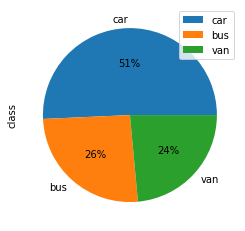

In [20]:
df2.plot(kind='pie',y='class',autopct='%1.0f%%');

Splitting and Scaling data 

In [23]:
X = df1.drop('class',axis = 1)
Y = df1['class']
XScaled = X.apply(zscore)
X_train,X_test,Y_train,Y_test=train_test_split(XScaled,Y,test_size=0.2)

In [24]:
XScaled.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [36]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,classification_report, confusion_matrix

In [37]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, Y_train)

In [38]:
rbf_pred = rbf.predict(X_test)

Classification metrics

In [39]:
rbf_accuracy = accuracy_score(Y_test, rbf_pred)
rbf_f1 = f1_score(Y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  62.35
F1 (RBF Kernel):  55.39


In [40]:
print(classification_report(Y_test, rbf_pred))
print(confusion_matrix(Y_test, rbf_pred))

              precision    recall  f1-score   support

         bus       1.00      0.31      0.48        51
         car       0.57      1.00      0.73        86
         van       1.00      0.12      0.22        33

    accuracy                           0.62       170
   macro avg       0.86      0.48      0.47       170
weighted avg       0.78      0.62      0.55       170

[[16 35  0]
 [ 0 86  0]
 [ 0 29  4]]


In [41]:
y_grid = (np.column_stack([Y_test,rbf_pred]))
print(y_grid)

[['van' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['bus' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['van' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['bus' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['car' 'car']
 ['van' 'car']
 ['van' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'car']
 ['van' 'car']
 ['bus' 'car']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['van' 'car']
 ['bus' 'bus']
 ['bus' 'b

In [42]:
pd.set_option('display.max_columns', 26)

pd.crosstab(rbf_pred, Y_test)

class,bus,car,van
row_0,,,
bus,16,0,0
car,35,86,29
van,0,0,4


In [43]:
unmatched = []
for i in range(len(y_grid)):
    if y_grid[i][0] != y_grid[i][1]:
        unmatched.append(i)

In [44]:
y_grid[unmatched]

array([['van', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['van', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['bus', 'car'],
       ['van', 'car'],
       ['bu

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

In [46]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [47]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


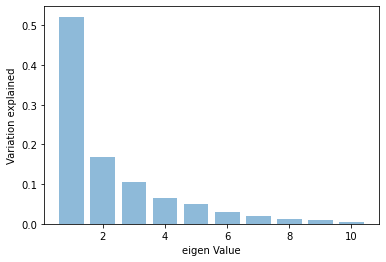

In [48]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

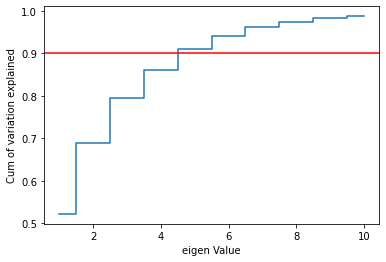

In [49]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

As we can see total six components explains more than 90% variance explained.

In [63]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)

PCA(n_components=6)

In [51]:
print(pca6.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413]


In [52]:
Xpca6 = pca6.transform(XScaled)

In [53]:
Xpca6

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007080e-02, -7.57446693e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01,  7.05041037e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680051e-02, -4.02491279e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510368e-02, -3.35637136e-01]])

In [55]:
X_train1,X_test1,Y_train,Y_test=train_test_split(Xpca6,Y,test_size=0.2)

In [56]:
rbf1 = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train1, Y_train)

In [57]:
rbf_pred1 = rbf1.predict(X_test1)

In [58]:
rbf_accuracy = accuracy_score(Y_test, rbf_pred1)
rbf_f1 = f1_score(Y_test, rbf_pred1, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  55.88
F1 (RBF Kernel):  49.49


In [59]:
print(classification_report(Y_test, rbf_pred1))
print(confusion_matrix(Y_test, rbf_pred1))

              precision    recall  f1-score   support

         bus       0.81      0.30      0.43        44
         car       0.50      0.97      0.66        75
         van       1.00      0.18      0.30        51

    accuracy                           0.56       170
   macro avg       0.77      0.48      0.47       170
weighted avg       0.73      0.56      0.49       170

[[13 31  0]
 [ 2 73  0]
 [ 1 41  9]]


Overall performance has declined.

In [67]:
poly = svm.SVC(kernel = 'poly',degree = 3, C = 1).fit(X_train1,Y_train)

In [68]:
poly_pred = poly1.predict(X_test1)

In [69]:
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f*100))

Accuracy (Polynomial Kernel):  61.76
F1 (Polynomial Kernel):  59.04


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, poly_pred))
print(confusion_matrix(Y_test, poly_pred))

              precision    recall  f1-score   support

         bus       0.89      0.36      0.52        44
         car       0.54      0.93      0.69        75
         van       0.83      0.37      0.51        51

    accuracy                           0.62       170
   macro avg       0.75      0.56      0.57       170
weighted avg       0.72      0.62      0.59       170

[[16 27  1]
 [ 2 70  3]
 [ 0 32 19]]


62% accuracy

In [73]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, cv = 5)
grid.fit(X_train1, Y_train)


# fitting the model for randomizedsearchcv as gridsearchcv is really time consuming

print(grid.best_params_) 
print(grid.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.831 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.830 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.830 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.837 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.889 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.640 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.689 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.681 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.652 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.637 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.529 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.815 total time= 2.2min
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.822 total time=16.3min
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.726 total time= 1.2min
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.822 total time= 7.5min
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.787 total time=   1.1s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.830 total time=   0.9s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.867 total time=   0.7s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.830 total time=   1.2s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.874 total time=   0.5s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.809 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.793 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

In [75]:
grid_predictions = grid.predict(X_test1)
 
# print classification report
print(classification_report(Y_test, grid_predictions))
print(confusion_matrix(Y_test, grid_predictions))

              precision    recall  f1-score   support

         bus       0.83      0.80      0.81        44
         car       0.83      0.84      0.83        75
         van       0.85      0.86      0.85        51

    accuracy                           0.84       170
   macro avg       0.84      0.83      0.83       170
weighted avg       0.84      0.84      0.84       170

[[35  7  2]
 [ 6 63  6]
 [ 1  6 44]]


Performance has been improved significantly.
Percentage of F1 score and Accuracy score has been increased.

# Prerequisite/Assumption of PCA
1.  There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables    exhibit relationships among themselves.
2. PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.
3. All variables should be accessed on the same ratio level of measurement. The most preferred norm is at least 150 observations of the sample set with a ratio measurement of 5:1.
4. Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade ML algorithm.
5. The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

# Advantages and Disadvantages of PCA
1. It removes correlated features
2. Improves Algorithm Performance
3. Reduces Overfitting
4. Improves Visualization
# Disadvantages of Principal Component Analysis
1. Independent variables become less interpretable
2. Data standardization is must before PCA
3. Information Loss
